In [1]:
from matplotlib import pyplot as plt
import numpy as np

## Initialize the 'learning images' by hand
    - Here are 4 random numbers and their plots.

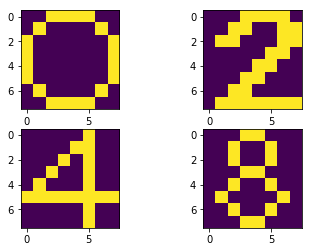

In [419]:
array1= np.array(
        [[0,0,1,1,1,1,0,0],
         [0,1,0,0,0,0,1,0],
         [1,0,0,0,0,0,0,1],
         [1,0,0,0,0,0,0,1],
         [1,0,0,0,0,0,0,1],
         [1,0,0,0,0,0,0,1],
         [0,1,0,0,0,0,1,0],
         [0,0,1,1,1,1,0,0]])
array2 = np.array(
        [[0,0,0,1,1,1,1,0],
         [0,0,1,1,0,0,1,1],
         [0,1,1,0,0,0,1,1],
         [0,0,0,0,0,1,1,0],
         [0,0,0,0,1,1,0,0],
         [0,0,0,1,1,0,0,0],
         [0,0,1,1,0,0,0,0],
         [0,1,1,1,1,1,1,1]])
array4 = np.array(
        [[0,0,0,0,0,1,0,0],
         [0,0,0,0,1,1,0,0],
         [0,0,0,1,0,1,0,0],
         [0,0,1,0,0,1,0,0],
         [0,1,0,0,0,1,0,0],
         [1,1,1,1,1,1,1,1],
         [0,0,0,0,0,1,0,0],
         [0,0,0,0,0,1,0,0]])
array8 = np.array(
        [[0,0,0,1,1,0,0,0],
         [0,0,1,0,0,1,0,0],
         [0,0,1,0,0,1,0,0],
         [0,0,0,1,1,0,0,0],
         [0,0,1,0,0,1,0,0],
         [0,1,0,0,0,0,1,0],
         [0,0,1,0,0,1,0,0],
         [0,0,0,1,1,0,0,0]])

plt.subplot(2,2,1)
imgplot1 = plt.imshow(array1)
plt.subplot(2,2,2)
imgplot2 = plt.imshow(array2)
plt.subplot(2,2,3)
imgplot4 = plt.imshow(array4)
plt.subplot(2,2,4)
imgplot8 = plt.imshow(array8)

## Make learning images 1D
    - We need 1D arrays for the Hopfield Model.
    - You can see one of the 1D arrays as an example in the output of the cell below.

In [420]:
v1 = array1.flatten()
v2 = array2.flatten()
v4 = array4.flatten()
v8 = array8.flatten()

# Convert zeros of learning patterns to -1's.
v1[v1 == 0] = -1
v2[v2 == 0] = -1
v4[v4 == 0] = -1
v8[v8 == 0] = -1

#Let's see one of them as an example
v8

array([-1, -1, -1,  1,  1, -1, -1, -1, -1, -1,  1, -1, -1,  1, -1, -1, -1,
       -1,  1, -1, -1,  1, -1, -1, -1, -1, -1,  1,  1, -1, -1, -1, -1, -1,
        1, -1, -1,  1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1, -1, -1,  1,
       -1, -1,  1, -1, -1, -1, -1, -1,  1,  1, -1, -1, -1])

## Create learning matrices (learning patterns) by 'pattern times pattern.transpose'
    - I have created the learning matrices (learning patterns) by dot product of a 1D learning array and its transpose. And I subtracted identity matrix to make the diagonal all zeros.
    - You can see one of the learning matrices as an example in the output of the cell below.

In [421]:
learning_matrix1 = np.dot(v1[:,None],v1[None,:])
learning_matrix2 = np.dot(v2[:,None],v2[None,:])
learning_matrix4 = np.dot(v4[:,None],v4[None,:])
learning_matrix8 = np.dot(v8[:,None],v8[None,:])

# Subtract identity matrix for all learning matrices
learning_matrix1 = np.subtract(learning_matrix1, np.identity(learning_matrix1.shape[1]))
learning_matrix2 = np.subtract(learning_matrix2, np.identity(learning_matrix2.shape[1]))
learning_matrix4 = np.subtract(learning_matrix4, np.identity(learning_matrix4.shape[1]))
learning_matrix8 = np.subtract(learning_matrix8, np.identity(learning_matrix8.shape[1]))

learning_matrix4

array([[ 0.,  1.,  1., ..., -1.,  1.,  1.],
       [ 1.,  0.,  1., ..., -1.,  1.,  1.],
       [ 1.,  1.,  0., ..., -1.,  1.,  1.],
       ..., 
       [-1., -1., -1., ...,  0., -1., -1.],
       [ 1.,  1.,  1., ..., -1.,  0.,  1.],
       [ 1.,  1.,  1., ..., -1.,  1.,  0.]])

# Initialize weights
    - I have created a weights matrix randomly with 0 mean and 0.01 standard deviation.
    - I have filled the diagonal with zeros.

In [422]:
### Create a random weight matrix.
# Use seed to get the same result everytime.
np.random.seed(32423)
# Note that sigma is multiplied by 1.4 because (w+w.transpose)/2 operation
# to create a symmetric weight matrix distorts std.
mu, sigma = 0, (0.01)*1.44 # mean and standard deviation
# Create the weight matrix randomly
w = np.random.normal(mu, sigma, 64*64)
# Make it 2D to handle it easily
w = w.reshape((64,64))
# Make it symmetric
w_symm = (w + w.T)/2
# Fill the diagonal with zeros.
np.fill_diagonal(w_symm, 0)

print('Mean of weight matrix is' , w_symm.mean())
print('Standard deviation of weight matrix is' , w_symm.std())


Mean of weight matrix is -0.000466614970995
Standard deviation of weight matrix is 0.00993708009522


# W_new = W_old + learning_rate * learning_pattern
#### For all learning patterns
    - I updated the weight matrix
    - You can see the visualization of the weight matrix iterations as an output of the cell below.

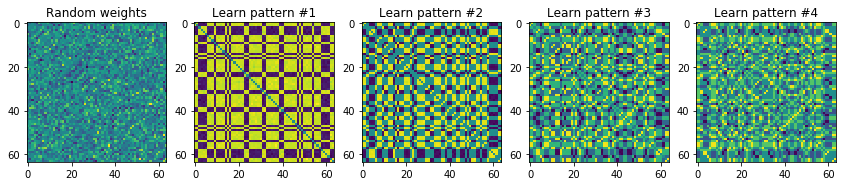

In [423]:
def learn_weights(weights_old, weight_learning_rate,learning_pattern):   
    weights_new = weights_old + weight_learning_rate * learning_pattern    
    return weights_new

# HYPERPARAMETER
weight_learning_rate = 0.2

learning_patterns = [learning_matrix1, learning_matrix2, learning_matrix4, learning_matrix8]
n_of_pat = len(learning_patterns)

# Big figure
fig = plt.gcf()
fig.set_size_inches(14.5, 8.5)

# Iterate over learning patterns and establish the final weight matrix.
w_cur = w_symm
plt.subplot(1,n_of_pat+1,1)
plt.imshow(w_cur)
plt.title('Random weights')
for i in range(n_of_pat):
    w_cur = learn_weights(w_cur, weight_learning_rate, learning_patterns[i])
    plt.subplot(1,n_of_pat+1,i+2)
    plt.imshow(w_cur)
    plt.title("".join(['Learn pattern #', str(i+1)]))

# We have established the weight matrix from learning patterns
w_new = w_cur

# Create inputs with noise (floats)
    - I have created the noisy versions of the numbers.
    - The noises are created with zero mean and 3 different standard deviations.

In [430]:
# 3 different standard deviation
noise_std_1 = 0.25
noise_std_2 = 0.30
noise_std_3 = 0.40
# HYPERPARAMETER this parameter determines when to convert 1 to -1, vice versa
changing_threshold = 0.2

noisy1_1 = v1 + np.random.normal(0,noise_std_1,len(v1))
noisy1_2 = v1 + np.random.normal(0,noise_std_2,len(v1))
noisy1_3 = v1 + np.random.normal(0,noise_std_3,len(v1))

noisy2_1 = v2 + np.random.normal(0,noise_std_1,len(v2))
noisy2_2 = v2 + np.random.normal(0,noise_std_2,len(v2))
noisy2_3 = v2 + np.random.normal(0,noise_std_3,len(v2))

noisy4_1 = v4 + np.random.normal(0,noise_std_1,len(v4))
noisy4_2 = v4 + np.random.normal(0,noise_std_2,len(v4))
noisy4_3 = v4 + np.random.normal(0,noise_std_3,len(v4))

noisy8_1 = v8 + np.random.normal(0,noise_std_1,len(v8))
noisy8_2 = v8 + np.random.normal(0,noise_std_2,len(v8))
noisy8_3 = v8 + np.random.normal(0,noise_std_3,len(v8))

# Plot noisy float images
    - You can see the noisy images with original ones as an output of the cell below.
    - They are all floats now, it will be converted to {+1,-1} space.

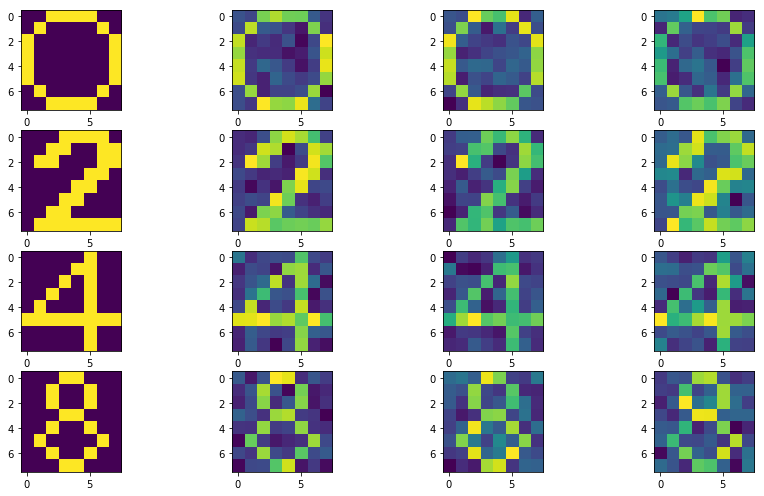

In [431]:
def plotAll():
    fig = plt.gcf()
    fig.set_size_inches(14.5, 8.5)
    # 1s
    plt.subplot(4,4,1)
    plt.imshow(array1)
    plt.subplot(4,4,2)
    plt.imshow(noisy1_1.reshape(8,8))
    plt.subplot(4,4,3)
    plt.imshow(noisy1_2.reshape(8,8))
    plt.subplot(4,4,4)
    plt.imshow(noisy1_3.reshape(8,8))
    # 2s
    plt.subplot(4,4,5)
    plt.imshow(array2)
    plt.subplot(4,4,6)
    plt.imshow(noisy2_1.reshape(8,8))
    plt.subplot(4,4,7)
    plt.imshow(noisy2_2.reshape(8,8))
    plt.subplot(4,4,8)
    plt.imshow(noisy2_3.reshape(8,8))
    # 4s
    plt.subplot(4,4,9)
    plt.imshow(array4)
    plt.subplot(4,4,10)
    plt.imshow(noisy4_1.reshape(8,8))
    plt.subplot(4,4,11)
    plt.imshow(noisy4_2.reshape(8,8))
    plt.subplot(4,4,12)
    plt.imshow(noisy4_3.reshape(8,8))
    # 8s
    plt.subplot(4,4,13)
    plt.imshow(array8)
    plt.subplot(4,4,14)
    plt.imshow(noisy8_1.reshape(8,8))
    plt.subplot(4,4,15)
    plt.imshow(noisy8_2.reshape(8,8))
    plt.subplot(4,4,16)
    plt.imshow(noisy8_3.reshape(8,8))
plotAll()

# Convert float noisy images to binary
    - This function converts a noisy float input to a noisy binary one.
    - You can see the visualizations as an output of the cell below.

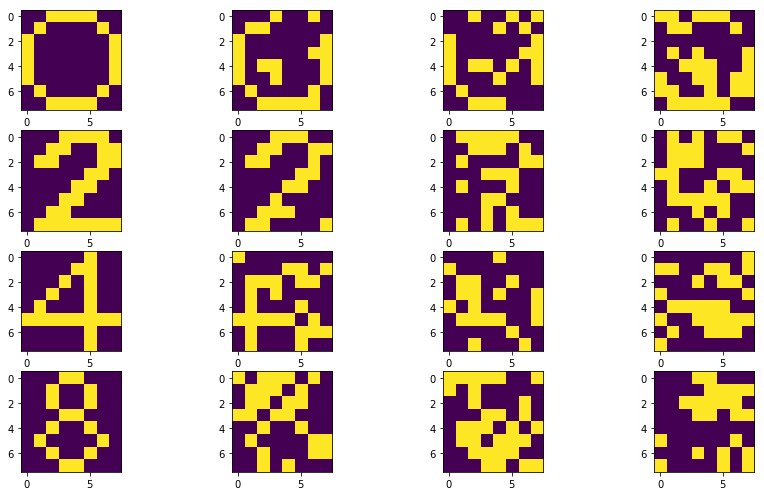

In [432]:
# This function converts noisy float input to noisy binary one.
def make_it_binary(noisy,original_vector,changing_threshold):
    noise_threshold = changing_threshold
    for i in range(len(noisy)):
        if original_vector[i] == 1:
            if noisy[i] < 1 - noise_threshold:
                noisy[i] = -1
            else:
                noisy[i] = 1
        else:
            if noisy[i] > -1 + noise_threshold:
                noisy[i] = 1
            else:
                noisy[i] = -1
    # noisy is binary now.            
    return noisy            

noisy1_1 = make_it_binary(noisy1_1,v1,changing_threshold)
noisy1_2 = make_it_binary(noisy1_2,v1,changing_threshold)
noisy1_3 = make_it_binary(noisy1_3,v1,changing_threshold)
noisy2_1 = make_it_binary(noisy2_1,v2,changing_threshold)
noisy2_2 = make_it_binary(noisy2_2,v2,changing_threshold)
noisy2_3 = make_it_binary(noisy2_3,v2,changing_threshold)
noisy4_1 = make_it_binary(noisy4_1,v4,changing_threshold)
noisy4_2 = make_it_binary(noisy4_2,v4,changing_threshold)
noisy4_3 = make_it_binary(noisy4_3,v4,changing_threshold)
noisy8_1 = make_it_binary(noisy8_1,v8,changing_threshold)
noisy8_2 = make_it_binary(noisy8_2,v8,changing_threshold)
noisy8_3 = make_it_binary(noisy8_3,v8,changing_threshold)

noisy_list = [noisy1_1,noisy1_2,noisy1_3,
              noisy2_1,noisy2_2,noisy2_3,
              noisy4_1,noisy4_2,noisy4_3,
              noisy8_1,noisy8_2,noisy8_3]

# Plot them all
plotAll()

# Energy method
    - This is an energy calculating method of the Hopfield Model.
    - Parameters are:
        - Input test vector
        - Weight matrix
        - Theta threshold

In [433]:
def current_energy(V,W, theta_threshold):
    energy = 0
    for i in range(len(V)):
        for j in range(len(V)):
            energy = energy + V[i]*V[j]*W[i][j]
        energy = energy + theta_threshold*V[i]
    return energy*(-0.5)

# One Iteration for Recognition
    This method does one iteration operation for recognition synchronously.

In [434]:
def sync_recognition_iteration(input_vector, W, theta_threshold):
    s = W.dot(input_vector)
    for i in range(len(s)):
        if s[i]>theta_threshold:
            s[i]=1
        else:
            s[i]=-1
    return s, current_energy(s,w_new,theta_threshold)

# Recognition
    - The cell below runs the Hopfield Model for each noisy input.
    - You can see the visualizations of iterations for each noisy input.

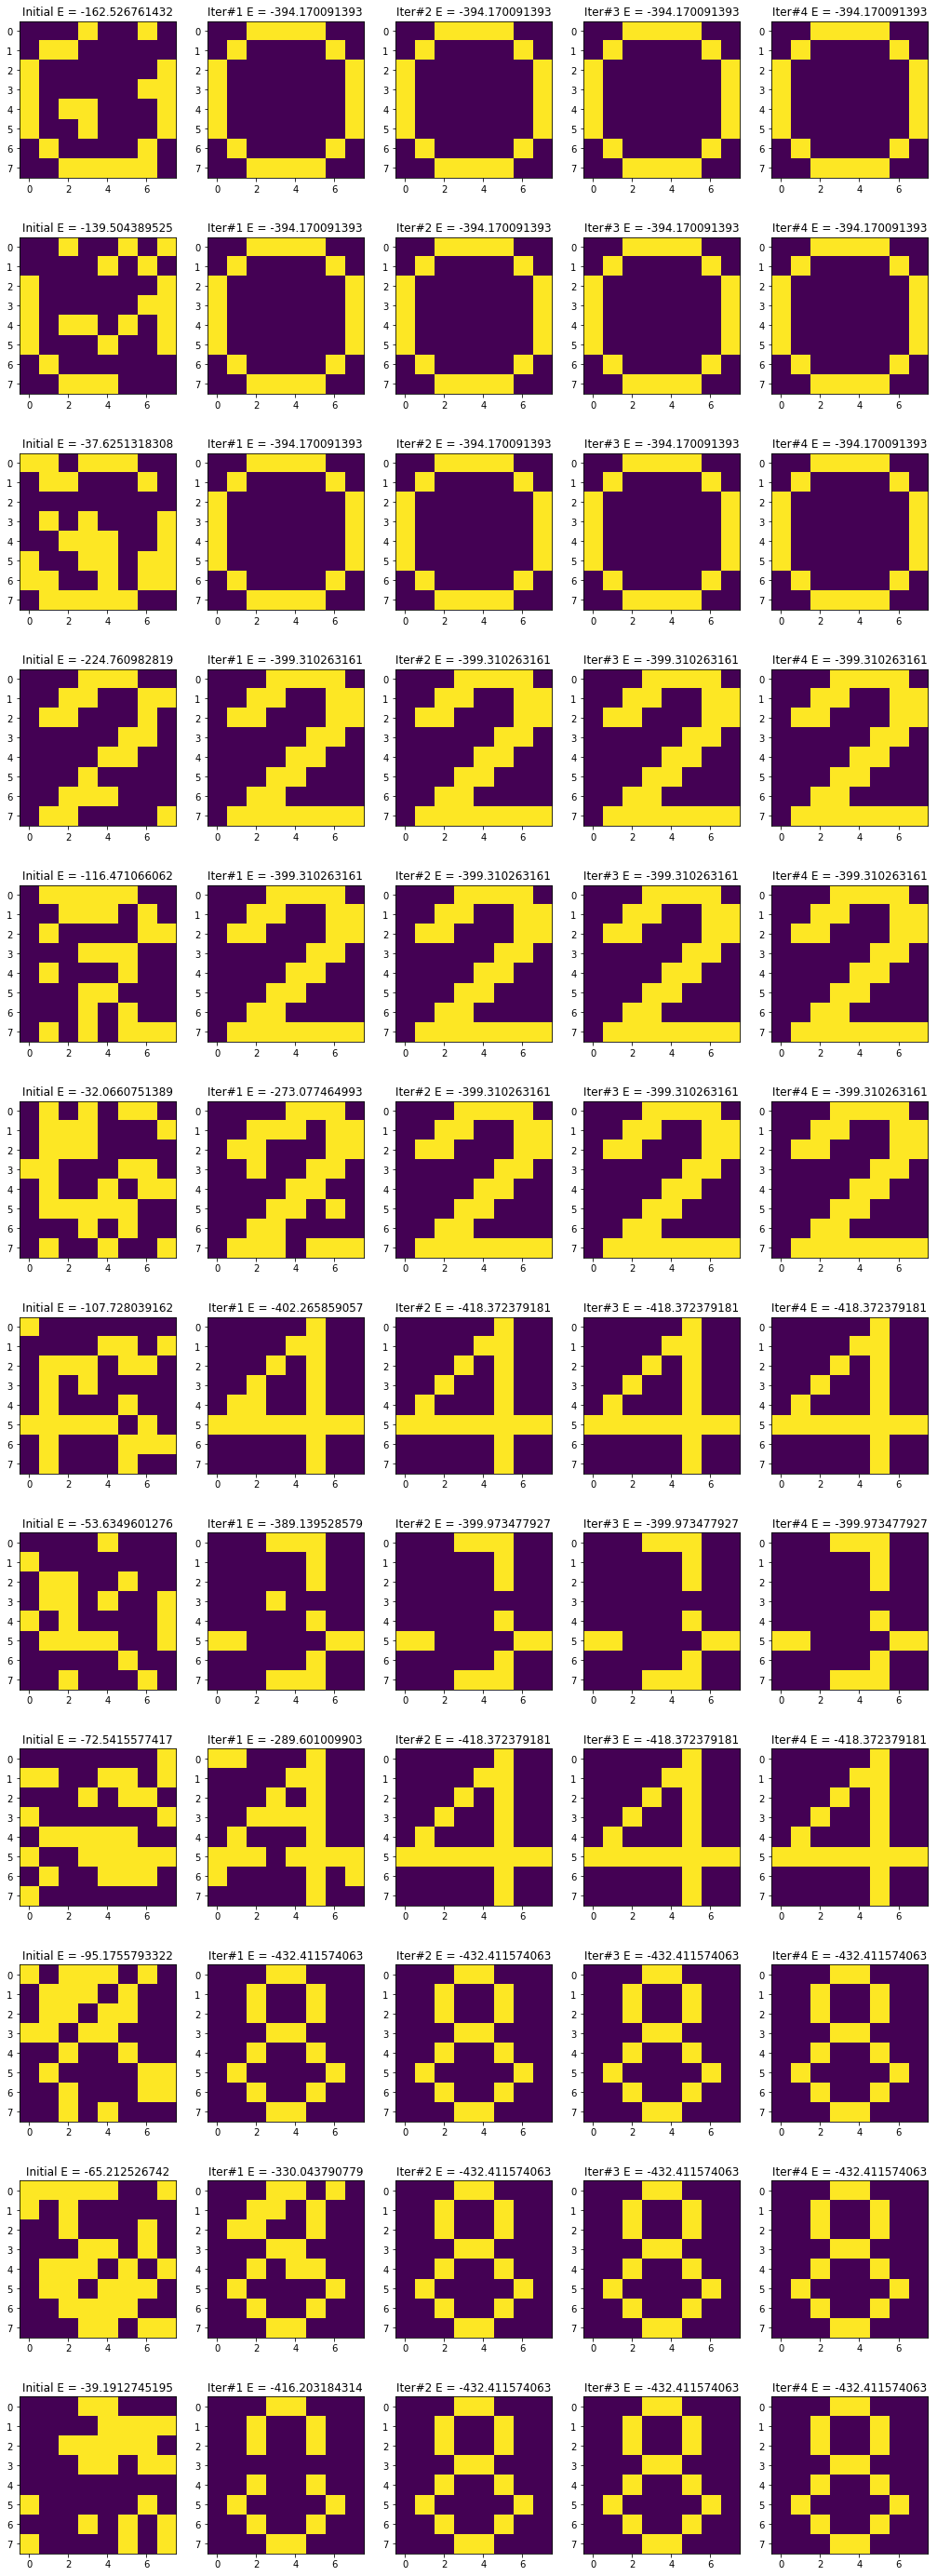

In [435]:
# HYPERPARAMETER
theta_threshold = 0
iterations = 4
test = noisy1_3.copy()

# Big figure
fig = plt.gcf()
fig.set_size_inches(17.5, 50.5)

for t in range(len(noisy_list[:])):
    test = noisy_list[t]
    plt.subplot(len(noisy_list),iterations+1,(t)*(iterations+1)+1)
    plt.title("".join(['Initial E = ', str(current_energy(test,w_new,theta_threshold))]))
    plt.imshow(test.reshape(8,8))
    for i in range(iterations):
        test, curr_E = sync_recognition_iteration(test, w_new, theta_threshold)
        plt.subplot(len(noisy_list),iterations+1,(t)*(iterations+1)+i+2)
        plt.title("".join(['Iter#',str(i+1),' E = ', str(curr_E)]))
        plt.imshow(test.reshape(8,8))
    

# Conclusion & Evaluation
 - The above given examples are visualizations of a simple Hopfield Model. The analysis of the model can be tested with different hyperparameters such as 'weight learning rate' or 'theta threshold' and different variances of noises. 
 - We can see that our model is usually works well. It usually converges to a learning pattern in a few synchronous iteration.
 - But in some cases, like the second noisy 4 input, it converges to some local minima which is not one of our learning patterns. This is a well-known drawback of the algorithm.